# **Previsões de venda usando anúncios de redes sociais** 

## Especialização - CIn-UFPE
### Estatistica Descritiva dos Dados
**Alunos:** 
* Priscilla Amarante de Lima (pal4@cin.ufpe.br)
* Glevson da Silva Pinto (gsp3@cin.ufpe.br)

## **Introdução**
As intenções de compra são informações coletadas por meio de pesquisas de intenção, nas quais produtos e serviços são medidos para avaliar a aceitação dos mesmos pelo consumidor. São informações que toda empresa deve ter e acompanhar para coletar dados e desenvolver um plano estratégico para entender possíveis necessidades ou ajustar as condições necessárias para tornar o produto atraente para os clientes.

Nossa base de dados pode ser acessada no Kaggle, em https://www.kaggle.com/rakeshrau/social-network-ads contendo um conjunto de dados categóricos para determinar se um usuário comprou um produto cliando no anúcio o que chamamos de taxa de conversão de Leads(Marketing), eles são a pedra fundamental do marketing moderno. Por meio da sua aquisição, é possível utilizar ferramentas de predição e análise de métricas e calcular o nível de engajamento do potencial cliente. Isso permitirá que você entenda em que etapa ele está em seu funil de vendas. Nesse caso foi aplicado ao conjunto obtido o modelo de predição Naive Bayes com objetido de predizer quais clientes obtidos por meio da Leads irá compra o produto clicando na propaganda. 


## Contexto :
Nesse projeto tem-se um conjunto de dados de anúncios da rede social. O conjunto de dados contém os detalhes dos usuários em um site de rede social para descobrir se um usuário compra um produto clicando no anúncio no site com base nos atributos: salário, idade e sexo.

# Importando biblioteca

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

## Importando dataset

In [ ]:
# Lendo drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Projeto disciplina estatística/Social_Network_Ads.csv')
X = dataset.iloc[:, [1,2, 3]].values
y = dataset.iloc[:, -1].values

Como nosso conjunto de dados contém variáveis ​​de caracteres, temos que codificá-lo usando LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
print(X[0])

[1 19 19000]


In [ ]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
#Verificando o tamanho
dataset.shape

(400, 5)

In [ ]:
# drop user id(no use)
dataset.drop('User ID', axis = 1, inplace=True)

Exclusão do atributo ID, pois não é relevante para nosso dataset.

In [ ]:
# Verifique os valores nulos em cada recurso
dataset.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Verificanto o tipo dos dados colunares
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


* 'Sexo ': valor categórico
* 'Idade': valor inteiro
* 'EstimatedSalary': valor inteiro
* 'Adquirido': variável de destino



# Dividir o conjunto de dados em conjunto de treinamento e conjunto de teste

Estamos realizando uma divisão de teste em nosso conjunto de dados. Estamos fornecendo o tamanho do teste como 0,20, o que significa que nossa amostra de treinamento contém 320 conjuntos de treinamento e a amostra de teste contém 80 conjuntos de teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Estatística Descritiva

In [ ]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6523dcd0>,
      dtype=object)

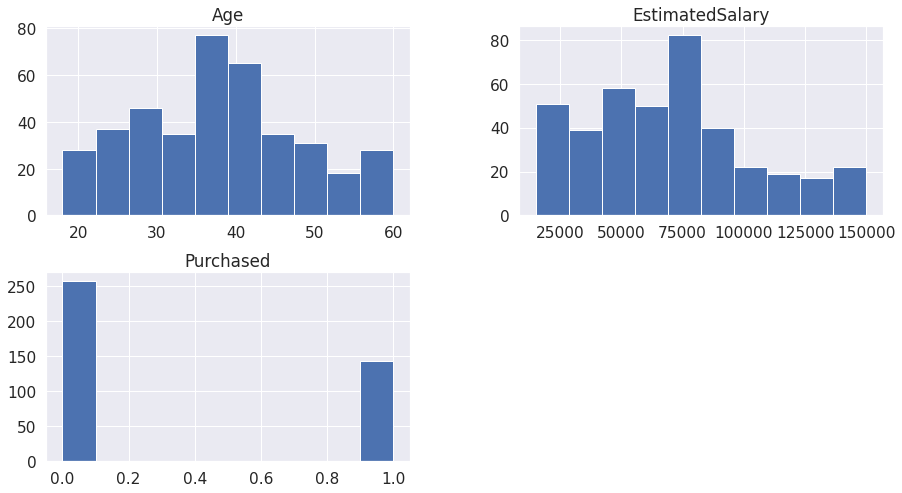

In [ ]:
dataset.hist(figsize = (15, 8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


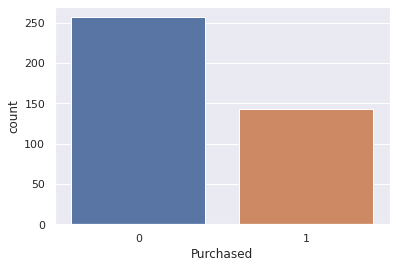

In [ ]:
sns.set(style = 'darkgrid')
sns.countplot('Purchased', data = dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


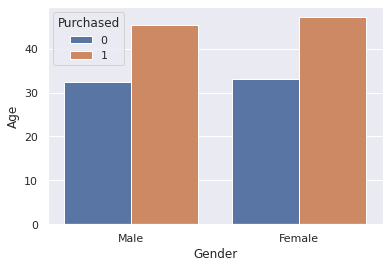

In [ ]:
sns.barplot('Gender', 'Age',data = dataset, hue = 'Purchased', ci = False)

##Usando o algoritmo SMOTE para balanceamento do dataset

In [ ]:
# trocando o tipo do atributo categórico de Gender para numérico: masculino (1), feminino (0)
dataset['Gender'] = dataset['Gender'].replace(['Male','Female'],[1,0])
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
# separando dados

X = dataset.drop(columns=['Purchased'])
y = dataset.Purchased


In [ ]:
# balanceando dados selecionados
X_balanceado, y_balanceado = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Script para juntar em um dataframe os dados que foram balanceados

dataset_balanceado = []
for i in range(len(y_balanceado)):
  linha = list(X_balanceado[i])
  linha.append(y_balanceado[i])
  dataset_balanceado.append(linha)
dataset_balanceado = pd.DataFrame(dataset_balanceado, columns=dataset.columns)
dataset_balanceado.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


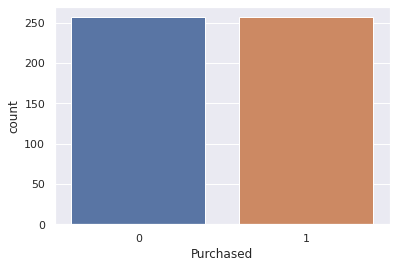

In [ ]:
sns.set(style = 'darkgrid')
sns.countplot('Purchased', data = dataset_balanceado)

##Estatística descritiva com gráficos explorando melhor os atributos


No handles with labels found to put in legend.


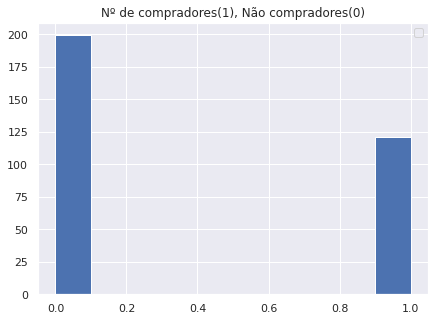

In [ ]:
#Proporção entre compradores e não compradores
plt.figure(figsize=(7,5))
plt.hist(y_train)
plt.legend()
plt.title('Nº de compradores(1), Não compradores(0)')
plt.show()

In [ ]:
#porcentagem dos compradores
np.sum(y_train)/len(y_train)

0.378125

#Dimensionamento de recursos

In [ ]:
#Escalonamento de recursos para o conjunto de treinamento e teste de variáveis ​​independentes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Modelo Naive Bayes - GaussianNB

De modo geral, o Naive Bayes é usado para prever a chance de um evento com base nos dados existentes. Além disso, pelo fato de ele ser ingênuo ("ingênuo"), ele ignora a relação entre as variáveis, pois só temos números que representam texto, e a relação entre as variáveis ​​é quase zero.

Usaremos o GaussianNB - Por se tratar de dados contínuos, uma suposição típica é que os valores contínuos associados a cada classe são distribuídos de acordo com uma distribuição normal (ou gaussiana).

No projeto assumimos features obedece a uma distribuição de probabilidade gaussiana.

In [ ]:
#Treinamento do modelo Naive Bayes no conjunto de treinamento
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#Resultados do conjunto de testes

In [ ]:
#Previsão dos resultados do conjunto de testes
y_pred = classifier.predict(X_test)

In [ ]:
y_pred  

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

Para os primeiros 8 valores, ambos são iguais. Podemos avaliar nossa matriz usando a matriz de confusão e a pontuação de precisão, comparando os valores de teste previstos e reais

#Matriz de Confusão

Em análise preditiva, a matriz de confusão (às vezes também chamada de 'matriz de erro' ou 'tabela de confusão' ) é uma tabela com duas linhas e duas colunas que relata o número de falsos positivos , falsos negativos , verdadeiros positivos e verdadeiros negativos .

In [ ]:
#Fazendo a matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
#acurácia
print('acurácia: {}'.format(accuracy_score(y_test,y_pred)))

acurácia: 0.925


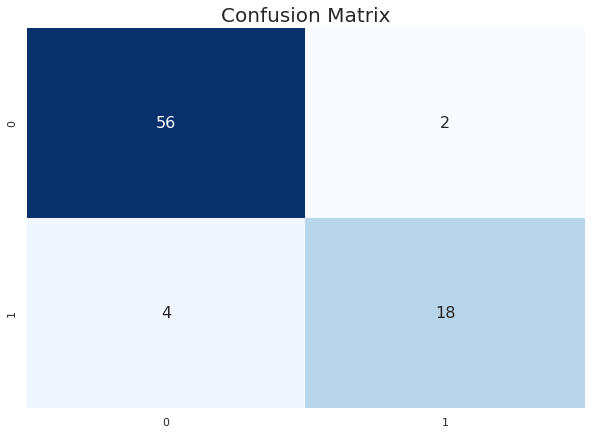

In [ ]:
#Matriz de confusão
cm

plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)

sns.set(font_scale=1.4)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

# Curva ROC

é uma representação gráfica que ilustra o desempenho de um sistema classificador binário à medida que o seu limiar de discriminação varia.

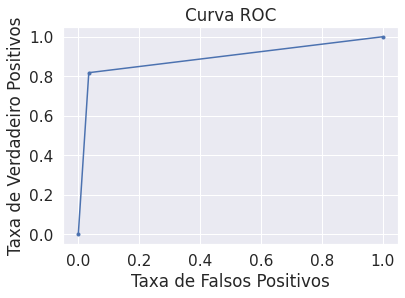

In [ ]:
from sklearn.metrics import roc_curve 

# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

# Usando Cross Validation K = 5

É uma técnica amplamente utilizada para avaliar o desempenho de modelos de aprendizado de máquina. O CV envolve a divisão dos dados em vários conjuntos (partes), um dos quais é usado para treinamento e o outro é usado para testar e avaliar o desempenho do modelo. É muito provável que o uso de CV detecte se o modelo está superdimensionando os dados de treinamento, ou seja, se está superdimensionando. Há mais de uma maneira de aplicar o CV. Neste projeto, vamos utilizar o método K-fold.

In [ ]:
from sklearn.model_selection import cross_val_score
pred_gnb = cross_val_score(GaussianNB(), X, y, cv=5)

In [ ]:
pred_gnb

array([0.8125, 0.9625, 0.925 , 0.8125, 0.9   ])

#Correlação

A correlação pode ser feita entre variáveis númericas e é de extrema importência quando se quer saber qual dado influência mais em um certo resultado ou em outro dado. Assim pode-se definir de forma mais fácil e prática quais dados escolher para analisar e se chegar a uma determinada conclusão.

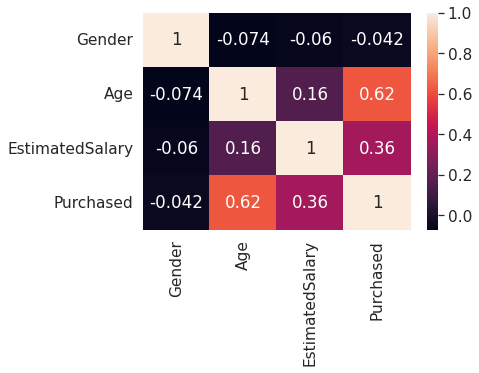

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

#Discretização por frequência

In [ ]:
dataset['Purchased'] = pd.qcut(dataset['Age'],5)
dataset['Purchased'].value_counts()

(17.999, 28.0]    90
(28.0, 35.0]      88
(47.0, 60.0]      77
(35.0, 40.0]      75
(40.0, 47.0]      70
Name: Purchased, dtype: int64

Text(0.5, 1.0, 'Quantidade de compras')

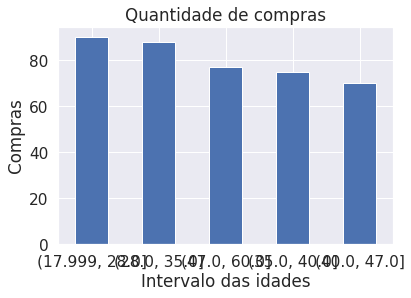

In [ ]:
counts = dataset['Purchased'].value_counts()
counts.plot.bar(rot=0)
plt.xlabel('Intervalo das idades')
plt.ylabel('Compras')
plt.title('Quantidade de compras')

#Visualizando Idade e Estimativa de salário

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 800x400 with 0 Axes>

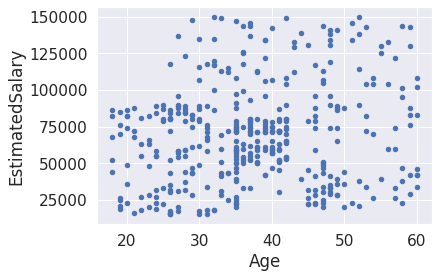

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
dataset.plot.scatter(x='Age',y='EstimatedSalary')